# Netzteile für LED-Beleuchtung

- [ ] TODO Zitierweise, Danksagung Förderung einfügen

## python konfigurieren

### Module importieren

In [1]:
import math
import numpy as np
import matplotlib
#matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('math', math)
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
math <module 'math' (built-in)>
numpy 1.20.1
matplotlib 3.3.4
pandas 1.2.4
datetime <module 'datetime' from 'C:\\Users\\andre\\anaconda3\\lib\\datetime.py'>
seaborn 0.11.1
plotly 4.14.3
sys 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\andre\\anaconda3\\lib\\os.py'>
platform 1.0.8
Image 8.2.0
requests 2.25.1
scipy 1.6.2


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

- [ ] TODO am Anfang immer die gleichen Layoutparameter laden -> in allen notebooks aktualisieren

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diesen Abschnitt:</b></div>
    <ul>
        <li> Ökodesign-Verordnung für LED-Netzteile einordnen </li>
        <li> Normative Anforderungen kennen </li>
        <li> Energieeffizienz bewerten </li>
    </ul>
</div>

## Normative Anforderungen an LED-Netzteile

````{margin}
<div class="admonition hint" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>Hinweis:</b></div>
VDE (und IEC etc.) -Normen finden sich im Netz der TH (vorher ggf. mit <a href='https://www.th-koeln.de/hochschule/vpn---virtual-private-network_26952.php'>VPN</a>  einloggen) in der <a href='https://www.normenbibliothek.de/vde-xaveropp/normenbibliothek/start.xav'>Normenbibliothek</a>.
</div>
````

Für die [CE-Kennzeichnung](https://de.wikipedia.org/wiki/CE-Kennzeichnung) sind einige Normen zu erfüllen {cite:p}`stocker_neue_2021`:

### Anforderungen an die elektrische Sicherheit
beschreibt die [Niederspannungs-Richtlinie](https://de.wikipedia.org/wiki/Richtlinie_2014/35/EU_(Niederspannungsrichtlinie)) 2014/35/EU und besonders für elektronische Vorschaltgeräte von Lampen EN 61347-1, 2-13 {cite:p}`stocker_neue_2021`

### Anforderungen an die [elektromagnetische Verträglichkeit (EMV)](https://de.wikipedia.org/wiki/Elektromagnetische_Vertr%C3%A4glichkeit) {cite:p}`stocker_neue_2021`
- [elektromagnetische Störungen](https://de.wikipedia.org/wiki/Elektromagnetische_St%C3%B6rung)
 - leitungsgebundene / emittierte Strahlung EN 55015
 - Oberwellen EN 61000-3-2
 - elektrische Spannungsschwankungen (Flicker) EN 61000-3-3
- [elektromagnetische Störempfindlichkeit](https://www.itwissen.info/EMS-electromagnetic-susceptibility-Elektromagnetische-Stoerempfindlichkeit.html)
 - elektromagnetische Störempfindlichkeit für Beleuchtung EN 61547
- [EMV-Richtlinie](https://de.wikipedia.org/wiki/Richtlinie_2014/30/EU_%C3%BCber_die_elektromagnetische_Vertr%C3%A4glichkeit) 2014/30/EU

### Anforderungen an Ökodesign {cite:p}`stocker_neue_2021`

neue Verordnung 2019/2020 mit Gültigkeit ab September 2021

#### Verschiebungsfaktor $\cos\varphi_1$ statt Leistungsfaktor $\lambda$ {cite:p}`europaische_kommission_verordnung_2021`

Der Verschiebungsfaktor $\cos\varphi_1$ beschreibt die Phasenverschiebung zwischen der Grundschwingung der Netzspannung und der Grundschwingung des Netzstroms. 

| Leistung | Grenzwert $\cos\varphi_1$ |
|-|-|
| $\leq5\text{ W}$ | - |
| $\leq10\text{ W}$ | $\geq 0,5$ |
| $\leq25\text{ W}$ | $\geq 0,7$ |
| $> 25\text{ W}$ | $\geq0,9$ |

- [ ] TODO Reflexionsfrage: ist der $\cos\varphi_1$ schwieriger einzuhalten als $\lambda$?

#### Standby-Leistung

Im Leerlaufzustand (falls dafür ausgelegt), Bereitschaftszustand und vernetzten Bereitschaftsbetrieb darf die Leistungsaufnahme max. $0,5\text{ W}$ betragen {cite:p}`europaische_kommission_verordnung_2021`.

- [ ] TODO Reflexionsfrage: wenn ein Gebäude mit 1000 vernetzten Lampen zu je 10 W elektrischer LEistungsaufnahme ausgestattet ist, wie hoch ist dann der jährliche Standbybedarf? Wieviel Prozent des Energiebedarfs für Beleuchtung entfällt darauf?

#### Flimmern {cite:p}`europaische_kommission_verordnung_2021`

Ein statischer Beobachter in einer statischen Umgebung nimmt visuelle Schwankungen als Flimmern wahr, wenn die Leuchtdichte oder Spektralverteilung zeitlich schwankt. Das kann man [einfach mit dem Handy testen](https://www.youtube.com/watch?v=CeDtCikrL6c) oder mit speziellen Messgeräten quantitativ messen.

Der Parameter muss bei Volllast $P_{st}\text{ LM} \leq 1,0$ betragen. "st" steht für "Kurzzeit" (short term) und "LM" für "Licht-Flimmermessmethode" (light flickermeter method). Bei $P_{st}\text{ LM}=1$ erkennt ein durchschnittlicher Beobachter das Flimmern mit einer Wahrscheinlichkeit von 50%.

- [ ] Reflexionsfrage: überprüfen Sie die LED-Lampen in Ihrer Umgebung auf Flimmern

Die Messvorschriften finden sich in IEC 61547-1 oder EN 61000-3-3. {cite:p}`stocker_neue_2021`

#### Stroboskop-Effekt

Damit ist die Änderung der Bewegungswahrnehmung eines statischen Beobachters in einer nicht statischen Umgebung aufgrund eines Lichtreizes gemeint, dessen Leuchtdichte oder Spektralverteilung zeitlich schwankt {cite:p}`europaische_kommission_verordnung_2021`

Die Schwankungen können periodisch sein oder nicht periodisch und durch die Lichtquelle selbst, die Stromquelle oder andere Einflüsse verursacht werden. {cite:p}`europaische_kommission_verordnung_2021`

Die Messgröße für den Stroboskop-Effekt in der Ökodesign-Verordnung ist SVM (stroboscopic visibility measure). Bei $\text{SVM}=1$ ist die Sichtbarkeitsschwelle eines durchschnittlichen Beobachters. {cite:p}`europaische_kommission_verordnung_2021`

Für die meisten LED-Leuchtmittel muss $\text{SVM}\leq0,4$ bei Volllast betragen. Ausnahmen gelten für Lichtquellen im Freien, Industrieanwendungen etc., die einen $\text{CRI}\leq0,8$ ermöglichen. {cite:p}`europaische_kommission_verordnung_2021`

Die Prüfung erfolgt nach IEC 63158. Ursache für Helligkeitsänderungen ist ein Wechselstromanteil auf dem Gleichausgang des LED-Netzteils. Bei Netzteilen für 230 V ist der 100 Hz Ripple zu berücksichtigen. {cite:p}`stocker_neue_2021`.

Bei 100 Hz ergibt sich aus {cite:p}`cie_visual_2016` eine Sichtbarkeitsschwelle nach der Formel mit $a=0,00518\text{ s}$, $b=306,6\text{ Hz}$:

\begin{equation}
T_{\nu}(f) = \frac{1}{1+e^{-a(f-b)}}+20\cdot e^{-f/10\text{ Hz}}
\end{equation}

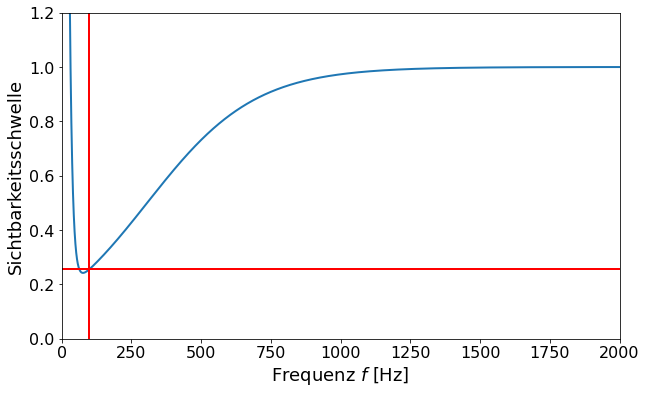

In [3]:
a = 0.00518
b = 306.6
f = np.linspace(0,2000,20000)
Tnu = (1/(1+np.exp(-a*(f-b))))+20*np.exp(-f/10)
plt.plot(f,Tnu)
plt.xlabel('Frequenz $f$ [Hz]')
plt.ylabel('Sichtbarkeitsschwelle')
plt.axis([0,2000,0,1.2])
plt.plot([100,100],[0,1.2],'r-')
Tnu100 = (1/(1+np.exp(-a*(100-b))))+20*np.exp(-100/10)
plt.plot([0,2000],[Tnu100,Tnu100],'r-');

Nach {cite:p}`cie_visual_2016` ergibt sich der Wert des $\text{SVM}$ aus den Einzelwerten $C_i$ und $T_{\nu,i}$ bei allen vorkommenden Frequenzen nach:

\begin{equation}
\text{SVM} = \sqrt[3,7]{\sum_{i=1\text{Hz}}^{\infty}(\frac{C_i}{T_{\nu,i}})^{3.7}}
\end{equation}

Da letztlich nur Frequenzen bis 2000 Hz berücksichtigt werden, sollte im gedimmten Zustand die PWM-Frequenz darüber liegen. {cite:p}`stocker_neue_2021`

#### Funktionsfähigkeit nach Dauerprüfung {cite:p}`europaische_kommission_verordnung_2021`

- mind. 9 von 10 Lichtquellen einer Prüfstichprobe müssen nach Abschluss der Prüfung noch funktionsfähig sein

- Umgebungsbedingungen und Prüfaufbau für die Dauerprüfung:
 - Umgebungstemperatur $25\pm10^\circ\text{C}$ und durchschnittliche Luftgeschwindigkeit $\leq0,2\text{ m/s}$
 - bei Schaltzyklen Lichtquellen vertikal nach oben befestigen (außer die Lichtquelle ist für andere Ausrichtung gebaut)
 - Spannungstoleranz $\pm 2\%$, Oberschwingungsgehalt der Versorgungsspannung $\leq 3\%$, Prüfung bei 230 V und 50 Hz

- Prüfung: 
 - anfänglicher Lichtstrom
 - 1200 kontinuierliche Schaltzyklen (je Schaltzyklus 150 min. bei Volllast und 30 min. ausgeschaltet) - ergibt 3000 Betriebsstunden, gesamte Prüfdauer 3600 Stunden
 - abschließender Lichtstrom der nicht ausgefallenen Lichtquellen
 - Division abschließender durch anfänglicher Lichtstrom = mittlerer Lichtstromerhalt $X_{LMF}$

\begin{equation}
X_{\text{LMF,min.}} [\%] = 100\cdot e^{3000\cdot \ln(0,7)/L_{70}}
\end{equation}

$L_{70}=L_{70} B_{50}$: Lebensdauer, d.h. der in Stunden gemessenen Zeit zwischen Beginn der Nutzung und Zeitpunkt zu dem 50% einer Population von Lichtquellen allmählich nur noch 70% des anfänglichen Lichtstromes aufweisen

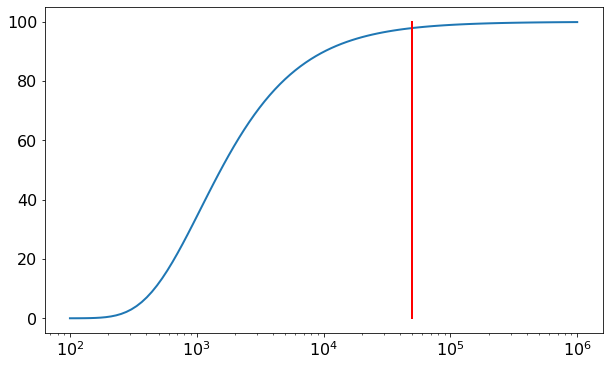

In [8]:
L70 = np.geomspace(1e2,1e6,100)
XLMFmin = 100*np.exp(3000*math.log(0.7)/L70)
plt.semilogx(L70,XLMFmin)
plt.semilogx([50e3,50e3],[0,100],'r-');

### Anforderungen an beschränkte Verwendung gefährlicher Stoffe
finden sich in den [RoHS-Richtlinien](https://de.wikipedia.org/wiki/RoHS-Richtlinien) {cite:p}`stocker_neue_2021`, aktuell 3. Revision 2015/863

## Energieeffizienz

Die Ökodesign-Verordnung (EU) 2019/2020 schreibt einen Mindestwirkungsgrad vor: Diese bezieht sich auf die angegebene Ausgangsleistung $P_{cg}$ eines LED-Betriebsgeräts bei Volllast:

\begin{equation}
\eta_{min}=\frac{P_{cg}^{0,81}}{1,09\cdot P_{cg}^{0,81} + 2,10}
\end{equation}

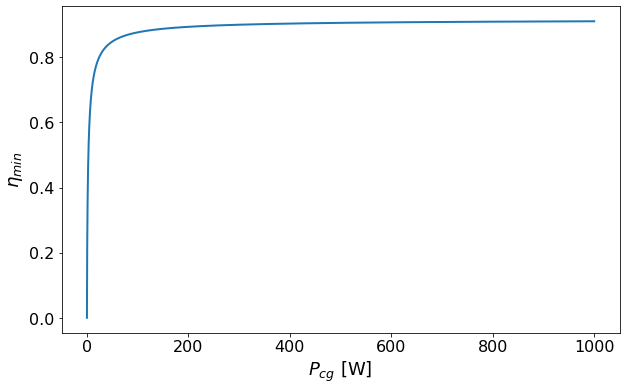

In [9]:
Pcg = np.linspace(0,1000,10000)
etamin = (Pcg**0.81)/((1.09*Pcg**0.81)+2.10)
plt.plot(Pcg,etamin,label=r'$\eta_{min}$')
plt.xlabel(r'$P_{cg}$ [W]')
plt.ylabel(r'$\eta_{min}$');

- [ ] TODO Reflexionsaufgabe einfügen: ermitteln Sie den Wirkungsgrad des Betriebsgeräts einer Lampe mit 7 W (häufig verwendete LED-"Birnengröße") - was bedeutet das?

## Literatur

```{bibliography}
:filter: docname in docnames
```